# CatBoost

## Importing the libraries

In [1]:
!pip install catboost

  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [3]:
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


## Training CatBoost on the Training set

In [8]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train, verbose=0)

## Making the Confusion Matrix

0.9781021897810219

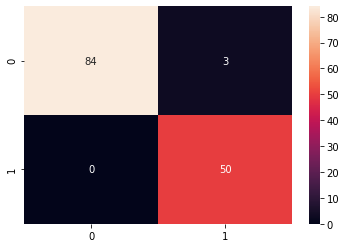

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
accuracy_score(y_test, y_pred)

## Applying k-Fold Cross Validation

In [10]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier(), X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Learning rate set to 0.007604
0:	learn: 0.6772057	total: 1.64ms	remaining: 1.64s
1:	learn: 0.6652633	total: 2.67ms	remaining: 1.33s
2:	learn: 0.6511784	total: 3.56ms	remaining: 1.18s
3:	learn: 0.6360094	total: 4.51ms	remaining: 1.12s
4:	learn: 0.6221218	total: 5.37ms	remaining: 1.07s
5:	learn: 0.6065689	total: 6.24ms	remaining: 1.03s
6:	learn: 0.5931935	total: 7.24ms	remaining: 1.03s
7:	learn: 0.5783827	total: 7.94ms	remaining: 985ms
8:	learn: 0.5646398	total: 8.91ms	remaining: 981ms
9:	learn: 0.5508871	total: 9.87ms	remaining: 977ms
10:	learn: 0.5390346	total: 10.9ms	remaining: 976ms
11:	learn: 0.5279564	total: 11.7ms	remaining: 965ms
12:	learn: 0.5181720	total: 12.6ms	remaining: 957ms
13:	learn: 0.5055409	total: 13.5ms	remaining: 949ms
14:	learn: 0.4943123	total: 14.4ms	remaining: 946ms
15:	learn: 0.4824866	total: 15.3ms	remaining: 942ms
16:	learn: 0.4729889	total: 16.3ms	remaining: 943ms
17:	learn: 0.4638986	total: 17.3ms	remaining: 943ms
18:	learn: 0.4549171	total: 18ms	remaining: 

## Grid Search CV

In [11]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 10),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid_search = GridSearchCV(
    estimator=classifier,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = -1, # use all available processors
    cv = 10,
    verbose=True,
    refit=True
)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 384 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  4.0min


0:	learn: 0.6563646	total: 318us	remaining: 50.7ms
1:	learn: 0.6226791	total: 705us	remaining: 55.8ms
2:	learn: 0.5936125	total: 999us	remaining: 52.3ms
3:	learn: 0.5671753	total: 1.22ms	remaining: 47.4ms
4:	learn: 0.5406946	total: 1.44ms	remaining: 44.5ms
5:	learn: 0.5150926	total: 1.74ms	remaining: 44.6ms
6:	learn: 0.4917204	total: 1.96ms	remaining: 42.9ms
7:	learn: 0.4698987	total: 2.18ms	remaining: 41.4ms
8:	learn: 0.4509510	total: 2.4ms	remaining: 40.3ms
9:	learn: 0.4322321	total: 2.69ms	remaining: 40.3ms
10:	learn: 0.4146628	total: 2.9ms	remaining: 39.3ms
11:	learn: 0.3976924	total: 3.13ms	remaining: 38.5ms
12:	learn: 0.3813679	total: 3.35ms	remaining: 37.9ms
13:	learn: 0.3657847	total: 3.56ms	remaining: 37.2ms
14:	learn: 0.3530994	total: 3.79ms	remaining: 36.6ms
15:	learn: 0.3401725	total: 4.08ms	remaining: 36.8ms
16:	learn: 0.3275873	total: 4.38ms	remaining: 36.9ms
17:	learn: 0.3155827	total: 4.6ms	remaining: 36.3ms
18:	learn: 0.3044553	total: 4.89ms	remaining: 36.3ms
19:	learn

[Parallel(n_jobs=-1)]: Done 3840 out of 3840 | elapsed:  5.2min finished


GridSearchCV(cv=10,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000027FFE59E4C0>,
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 10)},
             scoring='roc_auc', verbose=True)

In [12]:
grid_search.best_estimator_

In [13]:
grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 160}

In [15]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier(learning_rate = grid_search.best_params_['learning_rate'], max_depth = grid_search.best_params_['max_depth'], n_estimators = grid_search.best_params_['n_estimators'])
classifier.fit(X_train, y_train, verbose=0)

0.9562043795620438

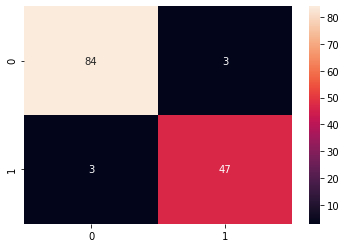

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
accuracy_score(y_test, y_pred)

In [17]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

0:	learn: 0.6557608	total: 275us	remaining: 43.8ms
1:	learn: 0.6216638	total: 600us	remaining: 47.4ms
2:	learn: 0.5895903	total: 808us	remaining: 42.3ms
3:	learn: 0.5636119	total: 1.06ms	remaining: 41.3ms
4:	learn: 0.5370987	total: 1.27ms	remaining: 39.3ms
5:	learn: 0.5114496	total: 1.48ms	remaining: 37.9ms
6:	learn: 0.4878138	total: 1.7ms	remaining: 37ms
7:	learn: 0.4659955	total: 2ms	remaining: 38ms
8:	learn: 0.4486642	total: 2.32ms	remaining: 38.9ms
9:	learn: 0.4299196	total: 2.53ms	remaining: 38ms
10:	learn: 0.4129942	total: 2.76ms	remaining: 37.3ms
11:	learn: 0.3959804	total: 2.97ms	remaining: 36.6ms
12:	learn: 0.3798286	total: 3.21ms	remaining: 36.3ms
13:	learn: 0.3642539	total: 3.49ms	remaining: 36.4ms
14:	learn: 0.3505071	total: 3.7ms	remaining: 35.8ms
15:	learn: 0.3370186	total: 3.92ms	remaining: 35.2ms
16:	learn: 0.3241703	total: 4.14ms	remaining: 34.8ms
17:	learn: 0.3112088	total: 4.35ms	remaining: 34.3ms
18:	learn: 0.3001254	total: 4.56ms	remaining: 33.9ms
19:	learn: 0.2892